# **Music Recommendation System**
**REPO VERSION**

# **Milestone 1**

## **Problem Definition**

**The context** - Why is this problem important to solve?<br>
**The objectives** - What is the intended goal?<br>
**The key questions** - What are the key questions that need to be answered?<br>
**The problem formulation** - What is it that we are trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name and the year of release. Second file contains the user id, song id and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Importing Libraries and the Dataset**

In [233]:
# mount the drive
#from google.colab import drive
#drive.mount('/content/drive')

In [234]:
import warnings # ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np # libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt # library for data visualization

import seaborn as sns # advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity # compute the cosine similarity between two vectors
from collections import defaultdict # dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # performance metrics in sklearn

from sklearn import preprocessing # for embedding encrypted data

In [235]:
# import the datasets
count_df = pd.read_csv('/Users/student/Downloads/count_data.csv')
song_df = pd.read_csv('/Users/student/Downloads/song_data.csv')

### **Understanding the data by viewing a few observations**

In [236]:
# top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


**Observations**
- The user_id and song_id are unique values. 
- Some users played a song more than once (i.e. 2x, 5x).

In [237]:
# check for unique values in count_df
count_df.nunique()

Unnamed: 0    2000000
user_id         76353
song_id         10000
play_count        295
dtype: int64

**Observations**
- There are a lot of unique values in the cound_df dataset. 
- Look into the specifics of the values that are unique. 

In [238]:
# value counts for dataframe count_df
count_df.value_counts()

Unnamed: 0  user_id                                   song_id             play_count
0           b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995  1             1
1333343     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOUOSVR12A8C137061  2             1
1333341     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOUFPNI12A8C142D19  5             1
1333340     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOUAWVS12A6D4F606C  14            1
1333339     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOTCLIO12AB0180F26  2             1
                                                                                       ..
666662      810bfc92d58786310e798c1229c701ecae84716e  SORJICW12A8C13640D  3             1
666661      810bfc92d58786310e798c1229c701ecae84716e  SOQJHUW12AB0188A24  6             1
666660      810bfc92d58786310e798c1229c701ecae84716e  SOQGVCS12AF72A078D  9             1
666659      810bfc92d58786310e798c1229c701ecae84716e  SOQARNI12A8C141964  5             1
1999999     d8b

In [239]:
# check for unique values in song_df
song_df.nunique()

song_id        999056
title          702428
release        149288
artist_name     72665
year               90
dtype: int64

**Observations**
- There are too many unique values in the song_df. 
- Dropping duplicates will help remedy this. 

In [240]:
# value counts for dataframe song_df
song_df.value_counts()

song_id             title                                    release                           artist_name               year
SOQNMCD12A8C1383D4  Come On Home                             Franz Ferdinand                   Franz Ferdinand           2004    3
SOEGQML12AF7299C84  California Callin'                       7                                 Enrique Iglesias          2003    3
SOXHYWX12A8C142CE8  Real World                               When The World Comes Down         The All-American Rejects  2008    3
SOEHQBQ12A6D4F9EA9  Before Three                             The Cure                          The Cure                  2004    3
SOZBJBH12A8151BD4E  Fade Together                            You Could Have It So Much Better  Franz Ferdinand           2005    3
                                                                                                                                ..
SOHXKYM12AF72AA2F4  3 Am                                     Deus Ex Machina            

**Observations** 
- At most a song is listened to 3 times.
- At the least a song is listened to 1x.

In [241]:
# top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


**Observations**
* There are missing values in the 'year' feature.
* There may be missing values in the consecutive feature (s). 

### **Let us check the data types and and missing values of each column**

In [242]:
# the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


**Observations**
- There are 2000000 entries.
- The data contains 4 columns.
- The data types are int64(2), object(2). 
- The dataset count_df uses more memory ~61.0+ MB. 

In [243]:
# the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


**Observations**
- There are 1000000 entries. 
- The data contains 5 columns. 
- The data types are int64(1), object(4). 
- The dataset song_df uses less memory ~38.1 MB.


In [244]:
# check for nulls on count_df dataset 
count_df.isnull().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

**Observations**
- There are no nulls in count_df. 

In [245]:
# check for nulls on song_df dataset 
song_df.isnull().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

**Observations**
- There are 15 titles missing from the data. 
- There are 5 releases missing from the data. 

In [251]:
# fill null values in song_df with fillna()
song_df = song_df.fillna(value=0)

In [252]:
# left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously.
merged_df = count_df.merge(song_df, how='left', on = 'song_id').drop_duplicates(['song_id'])

# drop the column 'Unnamed: 0'  
merged_df.drop(['Unnamed: 0'], axis = 1, inplace = True)


In [253]:
# apply label encoding for "song_id"
encoded_song_id =  preprocessing.LabelEncoder()
encoded_song_id.fit(merged_df.song_id)
merged_df.song_id = encoded_song_id.transform(merged_df.song_id)

# apply label encoding for "user_id"
encoded_user_id =  preprocessing.LabelEncoder()
encoded_user_id.fit(merged_df.user_id)
merged_df.user_id = encoded_user_id.transform(merged_df.user_id)

merged_df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,1309,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,1309,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,1309,736,1,Stronger,Graduation,Kanye West,2007
4,1309,750,1,Constellations,In Between Dreams,Jack Johnson,2005
5,1309,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Observations** 
- There are ~3498 songs that have been listened to ~4%-8% count. 
- There are ~9566 songs that do not have a significant listen count, at ~1% count. 
- The data contains users who have listened to very few songs and vice versa.
- Might be necessary to filter the data so that it contains users who have listened to a sufficient count of songs. 

In [254]:
merged_df.describe(include = [np.int, np.object_])

,user_id,song_id,play_count,title,release,artist_name,year
count,10000.000000,10000.00000,10000.000000,10000,10000,10000,10000.000000
unique,NaN,NaN,NaN,9567,5388,3375,NaN
top,NaN,NaN,NaN,Breathe,Greatest Hits,The Black Keys,NaN
freq,NaN,NaN,NaN,8,69,71,NaN
mean,912.812800,4999.50000,2.901800,NaN,NaN,NaN,1645.790700
std,520.727141,2886.89568,6.181988,NaN,NaN,NaN,764.117466
min,0.000000,0.00000,1.000000,NaN,NaN,NaN,0.000000
25%,469.000000,2499.75000,1.000000,NaN,NaN,NaN,1984.000000
50%,924.500000,4999.50000,1.000000,NaN,NaN,NaN,2002.000000
75%,1351.000000,7499.25000,3.000000,NaN,NaN,NaN,2007.000000


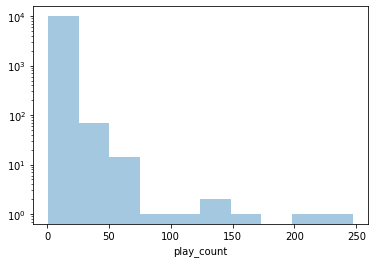

In [260]:
# histogram for play_count in log scale
merged_df.fillna(value=0)
play_count_histogram = sns.distplot(merged_df.play_count, kde=False, rug=False, bins=10)
play_count_histogram.set_yscale('log')

**Observations**
- The data is right skewed, with a few large play_counts that are driving the mean upward. 
- The data should be normalized. 

In [ ]:
# get the column containing the users
users = merged_df.user_id
# create a dictionary from users to their number of songs
ratings_count = dict()

# function to filter the data for users who have listened to a good count of songs
def sufficient_count_of_songs(): 
    for user in users:
    # if there already exists a user, just add 1 to the rating count
        if user in ratings_count:
            ratings_count[user] += 1
    # otherwise, set the rating count to 1
        else:
            ratings_count[user] = 1 
    some_ratings_count = list(ratings_count)[:200]
    print(some_ratings_count)
sufficient_count_of_songs()

[1309, 938, 1350, 966, 1072, 533, 1583, 1126, 1110, 1292, 159, 1508, 645, 1428, 486, 1690, 1333, 147, 1198, 1352, 69, 912, 452, 1759, 1154, 454, 297, 1010, 1377, 118, 1187, 1057, 291, 435, 1033, 1697, 1747, 214, 510, 1819, 1509, 10, 585, 474, 1044, 817, 1439, 1271, 283, 790, 1638, 1097, 847, 1173, 1296, 1188, 902, 1099, 1694, 1814, 812, 74, 442, 178, 1174, 1730, 1546, 539, 993, 411, 1402, 11, 1141, 710, 182, 1281, 1737, 217, 886, 1656, 158, 1290, 852, 448, 1060, 50, 918, 637, 1284, 141, 729, 610, 1064, 350, 318, 1142, 1672, 616, 1666, 1251, 1062, 529, 153, 1015, 870, 580, 1274, 1351, 505, 960, 939, 672, 1630, 1403, 96, 1688, 414, 961, 1515, 958, 1109, 395, 1179, 1331, 875, 1625, 1008, 584, 677, 1622, 982, 169, 1782, 1391, 1661, 97, 239, 1584, 278, 936, 233, 1651, 1338, 837, 623, 44, 1648, 255, 161, 1601, 26, 1312, 1580, 1692, 877, 1749, 328, 598, 523, 496, 117, 1822, 754, 1279, 236, 368, 122, 1075, 992, 185, 1668, 1183, 1121, 1605, 1243, 173, 308, 1061, 548, 349, 1778, 1560, 704, 1021,

In [ ]:
# set a threshold of users' listen counts to at least 90 songs 
RATINGS_CUTOFF = 90
remove_users = []
def ratings_cutoff():
    for user, num_ratings in ratings_count.items():
        if num_ratings < RATINGS_CUTOFF:
            remove_users.append(user)
    df = merged_df.loc[~merged_df.user_id.isin(remove_users)]

In [ ]:
# get the column containing the users
users = merged_df.song_id
# create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # if we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
# set a threshold of users' listen counts to at least 120 songs 
RATINGS_CUTOFF = 120
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df_final= merged_df.loc[~merged_df.song_id.isin(remove_users)]

In [ ]:
# drop records with play_count more than(>) 5
#df_final= 

In [ ]:
from IPython.display import display
# function that groups songs by title and play_count with percentage of song counts listened
def group_songs_by_play_count():
    grouped_songs_df = merged_df.groupby(['title']).agg({'play_count': 'count'}).reset_index()
    grouped_songs_sum = grouped_songs_df['play_count'].sum()
    grouped_songs_df['percentage'] = grouped_songs_df['play_count'].div(grouped_songs_sum)*100
    final_grouped_songs_df = grouped_songs_df.sort_values(['play_count', 'title'], ascending = [0,1])
    display(final_grouped_songs_df)
group_songs_by_play_count()

In [ ]:
# Check the shape of the data


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

# Total number of unique user id

In [ ]:
# display total number of unique user_id


0

Total number of unique song id

In [ ]:
# display total number of unique song_id


Total number of unique artists

In [ ]:
# display total number of unique artists


#### **Observations and Insights:__________**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

Most interacted users

#### **Observations and Insights:_______**


Songs played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.ylabel('number of titles played') 
# Show the plot
plt.show()

**Observations**
- There are 1000000 entries. 
- The data contains 5 columns. 
- The data types are int64(1), object(4). 
- The dataset song_df uses less memory ~38.1 MB.

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Proposed approach**
**Potential techniques** - What different techniques should be explored?<br>
**Overall solution design** - What is the potential solution design?<br>
**Measures of success**- What are the key measures of success to compare different potential technqiues?<br>